<a href="https://colab.research.google.com/github/Sumit-ai/100-days-coding/blob/main/neural_net_nasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import file from drive 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import pandas as pd
import numpy as np

In [3]:
abalone_train = pd.read_csv('drive/MyDrive/Colab Notebooks/finalNasa_data (1).csv')
abalone_train.head()

,Unnamed: 0,RUL,alt,Mach,TRA,T2,unit,cycle,Fc,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf
0,0,99,3013.0,0.376362,70.311996,522.314770,1.0,1.0,1.0,618.288596,1470.469798,1849.620676,1269.275585,19.432070,14.484611,19.727990,24.410990,394.701872,401.205188,15.974771,2142.253462,8693.176503,4.621622
1,1,99,3020.0,0.376866,70.311996,522.327145,1.0,1.0,1.0,618.296355,1470.415593,1849.519871,1269.177159,19.431385,14.484683,19.727295,24.410483,394.629899,401.132851,15.970518,2142.218596,8693.000298,4.620561
2,2,99,3025.0,0.377685,70.311996,522.371840,1.0,1.0,1.0,618.336514,1470.453853,1849.566139,1269.167353,19.435163,14.488224,19.731130,24.415476,394.667850,401.171401,15.969419,2142.257956,8693.106262,4.621064
3,3,99,3035.0,0.376992,70.399887,522.282418,1.0,1.0,1.0,618.302173,1470.650929,1850.195069,1269.518670,19.426003,14.477632,19.721830,24.406544,394.773533,401.272707,15.967762,2142.794673,8693.680367,4.624305
4,4,99,3043.0,0.377622,70.399887,522.300605,1.0,1.0,1.0,618.345228,1470.640421,1849.950988,1269.253972,19.427484,14.478114,19.723334,24.410159,394.732158,401.234620,15.962571,2143.015150,8693.714825,4.622768


# label and features


In [4]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('RUL')

In [5]:
abalone_features = abalone_features.iloc[:, 1:]
abalone_features

,alt,Mach,TRA,T2,unit,cycle,Fc,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf
0,3013.0,0.376362,70.311996,522.314770,1.0,1.0,1.0,618.288596,1470.469798,1849.620676,1269.275585,19.432070,14.484611,19.727990,24.410990,394.701872,401.205188,15.974771,2142.253462,8693.176503,4.621622
1,3020.0,0.376866,70.311996,522.327145,1.0,1.0,1.0,618.296355,1470.415593,1849.519871,1269.177159,19.431385,14.484683,19.727295,24.410483,394.629899,401.132851,15.970518,2142.218596,8693.000298,4.620561
2,3025.0,0.377685,70.311996,522.371840,1.0,1.0,1.0,618.336514,1470.453853,1849.566139,1269.167353,19.435163,14.488224,19.731130,24.415476,394.667850,401.171401,15.969419,2142.257956,8693.106262,4.621064
3,3035.0,0.376992,70.399887,522.282418,1.0,1.0,1.0,618.302173,1470.650929,1850.195069,1269.518670,19.426003,14.477632,19.721830,24.406544,394.773533,401.272707,15.967762,2142.794673,8693.680367,4.624305
4,3043.0,0.377622,70.399887,522.300605,1.0,1.0,1.0,618.345228,1470.640421,1849.950988,1269.253972,19.427484,14.478114,19.723334,24.410159,394.732158,401.234620,15.962571,2143.015150,8693.714825,4.622768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7641863,3018.0,0.310653,26.367001,517.710478,10.0,82.0,3.0,569.171314,1262.152711,1505.220656,1142.358688,16.327415,14.032529,16.576056,18.692318,225.954240,230.620941,14.255220,1596.571022,7985.475267,2.174156
7641864,3014.0,0.309960,26.367001,517.681857,10.0,82.0,3.0,569.152102,1262.138240,1505.152347,1142.334251,16.325787,14.030423,16.574404,18.690493,225.950147,230.617148,14.256880,1596.577489,7985.456042,2.173944
7641865,3010.0,0.310149,26.367001,517.707243,10.0,82.0,3.0,569.173286,1262.180290,1505.292305,1142.446055,16.329035,14.033521,16.577700,18.693991,225.991428,230.658479,14.259194,1596.552581,7985.560636,2.174648
7641866,3005.0,0.309834,26.367001,517.706106,10.0,82.0,3.0,569.178315,1262.202029,1505.274693,1142.442261,16.330290,14.034248,16.578975,18.695488,226.017333,230.685275,14.261579,1596.586737,7985.651661,2.174786


# Spilit the data 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(abalone_features, abalone_labels, test_size=0.2,shuffle=False)

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
X_train = np.array(X_train)

X_train.shape

# model 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout 

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1024))
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Dense(256))
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
#rms = RMSprop()
#model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])
model.compile(loss='mean_absolute_error', optimizer= tf.optimizers.Adam())
model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1, validation_data=(X_test, y_test) )

Epoch 1/3
191047/191047 [==============================] - 466s 2ms/step - loss: 6.3311 - val_loss: 9.4076
Epoch 2/3
191047/191047 [==============================] - 500s 3ms/step - loss: 5.4453 - val_loss: 7.1998
Epoch 3/3
191047/191047 [==============================] - 462s 2ms/step - loss: 5.3087 - val_loss: 4.7084


# Results 

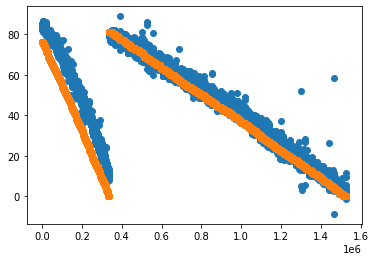

In [ ]:
y_pred_test = model.predict(np.array(X_test))
plt.plot(y_pred_test, 'o')
plt.plot(y_test.values, 'o')

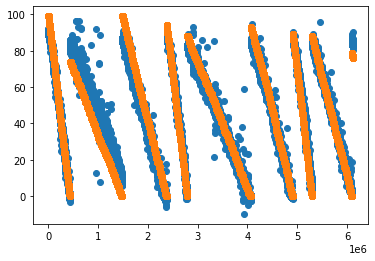

In [ ]:
y_pred_test = model.predict(np.array(X_train))
plt.plot(y_pred_test, 'o')
plt.plot(y_train.values, 'o')

In [ ]:
model.save('model1.h5')

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.evaluate(X_train, y_train)